# Практическое задание № 2. Нейронные сети


**Работу выполнил:**

Румянцев Алексей Александрович, 368731, ПИИ R22 бак 1.1 

## Прогнозирование цены на жилье с помощью нейросетевой регрессионной модели

Необходимо по имеющимся данным о ценах на жильё предсказать окончательную цену каждого дома с учетом характеристик домов с использованием нейронной сети. Описание набора данных  содержит 80 классов (набор переменых) классификации оценки типа жилья, и находится в файле `data_description.txt`.

В работе требуется дополнить раздел «Моделирование» в подразделе «Построение и обучение модели» создать и инициализировать последовательную модель нейронной сети с помощью фрэймворков тренировки нейронных сетей как: Torch или Tensorflow. Скомпилировать нейронную сеть выбрав функцию потерь и оптимизатор соответственно. Оценить точность полученных результатов. Вывести предсказанные данные о продаже.


### Импорт библиотек
Импортируем необходимые библиотеки:

In [1]:
from pathlib import Path
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Считываем набор данных


Загрузим набор данных и присвоим следующими переменные:

* `train_data`: данные, используемые для обучения модели
* `test_data`: данные, используемые для проверки модели

In [2]:
path = Path().resolve()
train_data = pd.read_csv(os.path.join(path, 'train.csv'))
test_data = pd.read_csv(os.path.join(path, 'test.csv'))

## Подготовка данных
### Отобразим обучающие и проверочные данные:

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Как можно видеть, `train_data` имеет на один столбец больше, чем `test_data`, это столбец `SalePrice`, для обучения модели перед применением ее для предсказания меток в test_data.

### Проверяем нет ли тестовые данные пустых значений значений (Nan)

Построим функцию `def missing_value_checker` для проверки и подсчёта пропущеных значений в test_data. А также выведем тип данных этих значений.


In [5]:
def missing_value_checker(data):
    list = []
    for feature, content in data.items():
        if data[feature].isnull().values.any():

            sum = data[feature].isna().sum()

            type = data[feature].dtype

            print (f'{feature}: {sum}, type: {type}')

            list.append(feature)
    print(list)

    print(len(list))

missing_value_checker(test_data)

MSZoning: 4, type: object
LotFrontage: 227, type: float64
Alley: 1352, type: object
Utilities: 2, type: object
Exterior1st: 1, type: object
Exterior2nd: 1, type: object
MasVnrType: 894, type: object
MasVnrArea: 15, type: float64
BsmtQual: 44, type: object
BsmtCond: 45, type: object
BsmtExposure: 44, type: object
BsmtFinType1: 42, type: object
BsmtFinSF1: 1, type: float64
BsmtFinType2: 42, type: object
BsmtFinSF2: 1, type: float64
BsmtUnfSF: 1, type: float64
TotalBsmtSF: 1, type: float64
BsmtFullBath: 2, type: float64
BsmtHalfBath: 2, type: float64
KitchenQual: 1, type: object
Functional: 2, type: object
FireplaceQu: 730, type: object
GarageType: 76, type: object
GarageYrBlt: 78, type: float64
GarageFinish: 78, type: object
GarageCars: 1, type: float64
GarageArea: 1, type: float64
GarageQual: 78, type: object
GarageCond: 78, type: object
PoolQC: 1456, type: object
Fence: 1169, type: object
MiscFeature: 1408, type: object
SaleType: 1, type: object
['MSZoning', 'LotFrontage', 'Alley', 'Ut

Проверяем какие признаки в таблице можно оставить, а какие удалить. Если пропущенных значений слишком много, то удалим признак. Если их небольшое количество, то заполним `mean` или `median` для чисел, новая категория `missing` для строковых объектов.

В соответствии с этим:

– удалим ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'];

– заполним числовое отсутствующее значение значением `mean`;

– заполним строковое отсутствующее значение значением `missing`.

In [6]:
test_edited = test_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)
train_edited = train_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)

def nan_filler(data):
    for label, content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            data[label] = content.fillna(content.median())
        else:
            data[label] = content.astype("category").cat.as_ordered()
            data[label] = pd.Categorical(content).codes+1

nan_filler(test_edited)
nan_filler(train_edited)

### Перепроверим наши данные:

In [7]:
missing_value_checker(test_edited)

[]
0


In [11]:
missing_value_checker(train_edited)

[]
0


In [8]:
train_edited.shape, test_edited.shape

((1460, 76), (1459, 75))

In [13]:
test_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int8   
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int8   
 6   LotShape       1459 non-null   int8   
 7   LandContour    1459 non-null   int8   
 8   Utilities      1459 non-null   int8   
 9   LotConfig      1459 non-null   int8   
 10  LandSlope      1459 non-null   int8   
 11  Neighborhood   1459 non-null   int8   
 12  Condition1     1459 non-null   int8   
 13  Condition2     1459 non-null   int8   
 14  BldgType       1459 non-null   int8   
 15  HouseStyle     1459 non-null   int8   
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [9]:
train_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int8   
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int8   
 6   LotShape       1460 non-null   int8   
 7   LandContour    1460 non-null   int8   
 8   Utilities      1460 non-null   int8   
 9   LotConfig      1460 non-null   int8   
 10  LandSlope      1460 non-null   int8   
 11  Neighborhood   1460 non-null   int8   
 12  Condition1     1460 non-null   int8   
 13  Condition2     1460 non-null   int8   
 14  BldgType       1460 non-null   int8   
 15  HouseStyle     1460 non-null   int8   
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Разделим данные

Поскольку мы не знаем метку (Цена) тестовых данных, для оценки модели, чтобы получить лучшую модель перед прогнозированием тестовых данных, разделим данные в файле train.scv на обучающие и проверочные данные, соотношение составляет 20%.

In [10]:
X = train_edited.drop('SalePrice', axis=1)
y = train_edited['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [16]:
X_train.shape, test_edited.shape

((1168, 75), (1459, 75))

## Моделирование

### Построение и обучение модели


Создайте последовательную модель нейронной сети с помощью фрэймворков тренировки нейронных сетей как: Torch или Tensorflow.

In [263]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


def get_seq_model(in_dim: int, out_dim: int, hid_dim: int = None,
                  hid_num: int = None, act: str = "relu", seed: int = 40):
    if in_dim <= 0:
        raise ValueError("Input dimension must be greater than 0.")
    if out_dim <= 0:
        raise ValueError('Output dimension must be greater than 0.')
    model = keras.Sequential()
    model.add(layers.Dense(in_dim, activation = act))
    if hid_dim is not None or hid_num is not None:
        if hid_dim is None or hid_dim <= 0:
            hid_dim = in_dim
        if hid_num is None or hid_num <= 0:
            hid_num = 1
        for _ in range(hid_num):
            model.add(layers.Dense(hid_dim, activation = act))
    model.add(layers.Dense(out_dim, activation = "linear"))

    tf.random.set_seed(seed)
    
    return model

in_sz = 150
out_sz = 1
simple_model = get_seq_model(in_dim=in_sz, out_dim=out_sz)

Скомпилируйте нейронную сеть, выбрав функцию потерь и оптимизатор соответственно.

In [264]:

simple_model.compile(optimizer='adam', loss=keras.losses.MeanSquaredLogarithmicError())

Обучите модель на обучающих данных `X_train` и `y_train` задав гиперпараметры вашей модели нейронной сети, например количество эпох (epochs), размер мини-выборки (batch_size) и другие.

In [265]:
simple_history = simple_model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 21.1946
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.9724 
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.7112
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7401
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5606
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7919
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2515
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8516
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5449
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3037
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1104
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9532
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8238
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7163
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6211
Epoch 16/20
37/3

**Оцените полученные результаты**

{'loss': [16.39346694946289, 9.185059547424316, 6.2228593826293945, 4.467592239379883, 3.3962409496307373, 2.6847050189971924, 2.177755832672119, 1.7989957332611084, 1.5065314769744873, 1.2752472162246704, 1.0890369415283203, 0.9370221495628357, 0.8115546107292175, 0.7068352103233337, 0.6100385189056396, 0.5162475109100342, 0.43583881855010986, 0.370424747467041, 0.31797611713409424, 0.27603432536125183]}


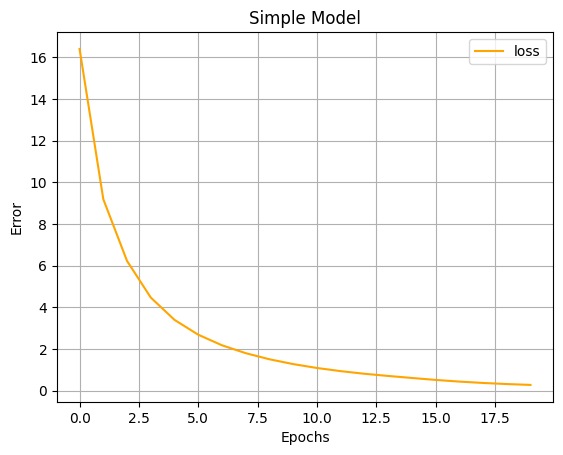

In [266]:
def show_loss(history, clr: str = None, name: str = None):
    pd.DataFrame(history.history).plot(color=clr)
    plt.ylabel('Error')
    plt.xlabel('Epochs')
    plt.title(name)
    plt.grid(True)
    print(history.history)

show_loss(simple_history, clr='orange', name='Simple Model')

In [267]:
simple_scores = simple_model.evaluate(X_val, y_val, verbose=1)
simple_scores

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.2578


0.2543884217739105

### Прогнозирование

In [268]:
simple_preds = simple_model.predict(test_edited)
simple_preds

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


array([[119305.78],
       [167045.2 ],
       [135646.23],
       ...,
       [171045.7 ],
       [120332.  ],
       [129262.09]], dtype=float32)

In [269]:
def get_output(preds):
    output = pd.DataFrame(
    {
        'Id': test_data['Id'],
        'OverAllCond': test_data['OverallCond'],
        'SaleCondition': test_data['SaleCondition'],
        'SalePrice': np.squeeze(preds)
    })
    return output

ans = get_output(simple_preds)
ans

,Id,OverAllCond,SaleCondition,SalePrice
0,1461,6,Normal,119305.781250
1,1462,6,Normal,167045.203125
2,1463,5,Normal,135646.234375
3,1464,6,Normal,119056.703125
4,1465,5,Normal,96830.312500
...,...,...,...,...
1454,2915,7,Normal,76966.953125
1455,2916,5,Abnorml,78195.546875
1456,2917,7,Abnorml,171045.703125
1457,2918,5,Normal,120332.000000


### Эксперименты

Будем эксперементировать со значениями различных параметров. Создание, компиляция, обучение модели, построение графика функции потерь и прогноз ищутся аналогично ранее проделанным шагам.

Попробуйте использовать разное количество нейронов на входном слое. Опишите достигнутый результат.

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 17.7504
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.3063
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4727
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0071
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2430
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8076
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5492
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3863
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2815
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2133
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1710
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1454
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1302
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1213
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1162
Epoch 16/20
37/37

,Id,OverAllCond,SaleCondition,SalePrice
0,1461,6,Normal,171023.375000
1,1462,6,Normal,227470.093750
2,1463,5,Normal,195967.625000
3,1464,6,Normal,173239.468750
4,1465,5,Normal,140859.000000
...,...,...,...,...
1454,2915,7,Normal,113073.500000
1455,2916,5,Abnorml,115107.460938
1456,2917,7,Abnorml,243395.062500
1457,2918,5,Normal,171381.078125


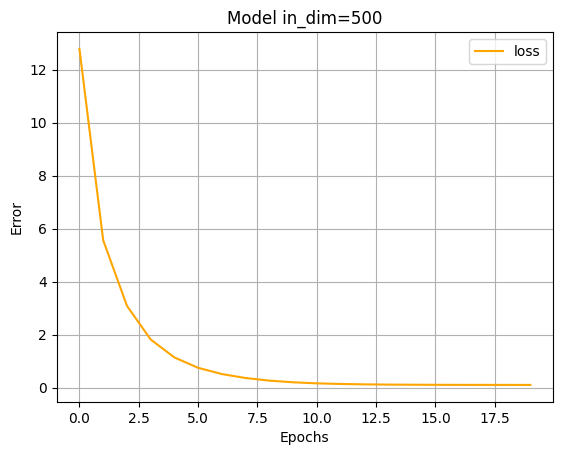

In [270]:
in_sz = 500 # Input layer dim (150->500)
out_sz = 1
model_in_500 = get_seq_model(in_dim=in_sz, out_dim=out_sz)
model_in_500.compile(optimizer='adam', loss=keras.losses.MeanSquaredLogarithmicError())

history_in_500 = model_in_500.fit(X_train, y_train, epochs=20, batch_size=32)
show_loss(history_in_500, clr='orange', name=f'Model in_dim={in_sz}')

scores_in_500 = model_in_500.evaluate(X_val, y_val, verbose=1)
scores_in_500
preds_in_500 = model_in_500.predict(test_edited)
preds_in_500

ans = get_output(preds_in_500)
ans

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 15.8712
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7506
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2389
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1669
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6631
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4033
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2665
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1936
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1542
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1331
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1218
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1158
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1127
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1110
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1100
Epoch 16/20
37/37

,Id,OverAllCond,SaleCondition,SalePrice
0,1461,6,Normal,172042.734375
1,1462,6,Normal,218808.187500
2,1463,5,Normal,196606.343750
3,1464,6,Normal,174575.375000
4,1465,5,Normal,143590.046875
...,...,...,...,...
1454,2915,7,Normal,114205.906250
1455,2916,5,Abnorml,116551.101562
1456,2917,7,Abnorml,243680.828125
1457,2918,5,Normal,171375.421875


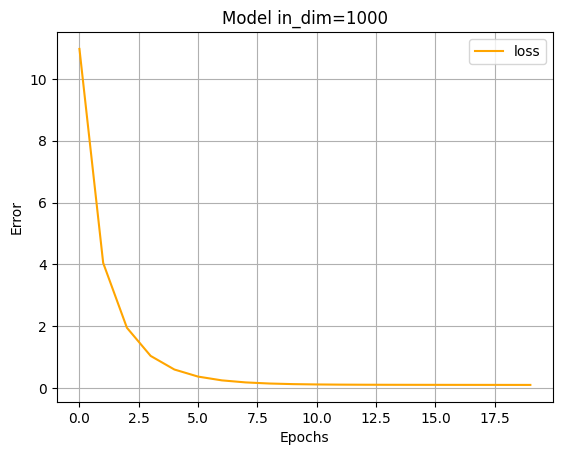

In [246]:
in_sz = 1000 # Input layer dim (500->1000)
out_sz = 1
model_in_1000 = get_seq_model(in_dim=in_sz, out_dim=out_sz)
model_in_1000.compile(optimizer='adam', loss=keras.losses.MeanSquaredLogarithmicError())

history_in_1000 = model_in_1000.fit(X_train, y_train, epochs=20, batch_size=32)
show_loss(history_in_1000, clr='orange', name=f'Model in_dim={in_sz}')

scores_in_1000 = model_in_1000.evaluate(X_val, y_val, verbose=1)
scores_in_1000
preds_in_1000 = model_in_1000.predict(test_edited)
preds_in_1000

ans = get_output(preds_in_1000)
ans

С увеличением нейронов на входном слое функция потерь быстрее убывает, то есть уменьшается ошибка.

Добавьте в нейронную сеть скрытый слой с разным количеством нейронов.

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 29.1365
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.7866
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6905
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6310
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7193
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3533
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2086
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1514
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1291
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1207
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1170
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1157
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1146
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1134
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1122
Epoch 16/20
37/37

,Id,OverAllCond,SaleCondition,SalePrice
0,1461,6,Normal,169477.234375
1,1462,6,Normal,218497.265625
2,1463,5,Normal,196136.546875
3,1464,6,Normal,175386.906250
4,1465,5,Normal,145303.109375
...,...,...,...,...
1454,2915,7,Normal,114153.257812
1455,2916,5,Abnorml,116723.460938
1456,2917,7,Abnorml,238119.515625
1457,2918,5,Normal,167210.687500


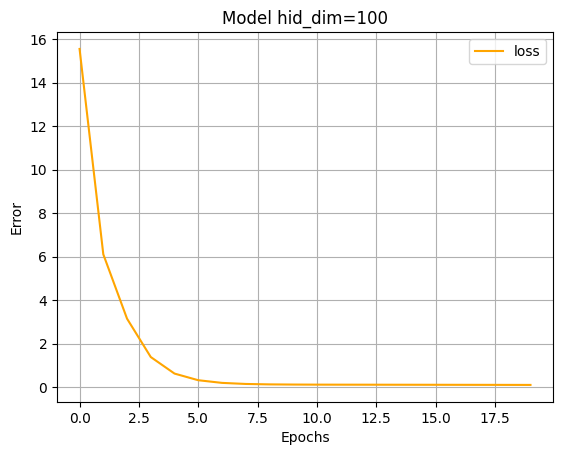

In [271]:
in_sz = 150
hid_sz = 100 # Hidden layer dim
out_sz = 1
model_hid_100 = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_100.compile(optimizer='adam', loss=keras.losses.MeanSquaredLogarithmicError())

history_hid_100 = model_hid_100.fit(X_train, y_train, epochs=20, batch_size=32)
show_loss(history_hid_100, clr='orange', name=f'Model hid_dim={hid_sz}')

scores_hid_100 = model_hid_100.evaluate(X_val, y_val, verbose=1)
scores_hid_100
preds_hid_100 = model_hid_100.predict(test_edited)
preds_hid_100

ans = get_output(preds_hid_100)
ans

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 16.4170
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0603
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5846
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1331
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1151
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1115
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1077
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1031
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0976
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0913
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0846
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0781
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0719
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0659
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0606
Epoch 16/20
37/37

,Id,OverAllCond,SaleCondition,SalePrice
0,1461,6,Normal,141403.703125
1,1462,6,Normal,167954.359375
2,1463,5,Normal,187429.000000
3,1464,6,Normal,185392.171875
4,1465,5,Normal,161378.203125
...,...,...,...,...
1454,2915,7,Normal,87084.085938
1455,2916,5,Abnorml,103446.460938
1456,2917,7,Abnorml,191223.375000
1457,2918,5,Normal,104469.867188


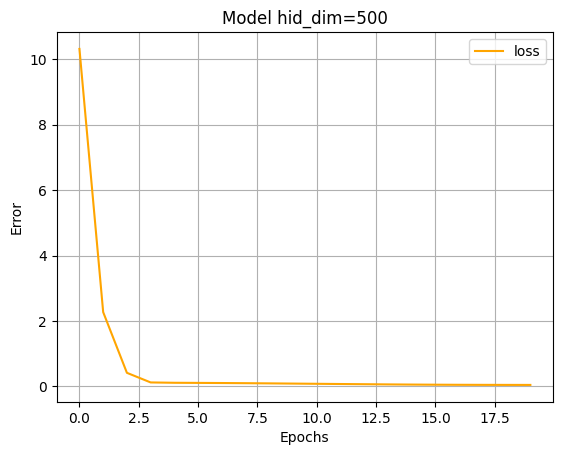

In [273]:
in_sz = 150
hid_sz = 500 # Hidden layer dim (100->500)
out_sz = 1
model_hid_500 = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_500.compile(optimizer='adam', loss=keras.losses.MeanSquaredLogarithmicError())

history_hid_500 = model_hid_500.fit(X_train, y_train, epochs=20, batch_size=32)
show_loss(history_hid_500, clr='orange', name=f'Model hid_dim={hid_sz}')

scores_hid_500 = model_hid_500.evaluate(X_val, y_val, verbose=1)
scores_hid_500
preds_hid_500 = model_hid_500.predict(test_edited)
preds_hid_500

ans = get_output(preds_hid_500)
ans

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 14.1909
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4677
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1608
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1120
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1072
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1023
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ -1s -30289us/step - loss: 0.0958
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0885
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0809
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0735
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0666
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0605
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0558
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0527
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0508
Epoch 16/20

,Id,OverAllCond,SaleCondition,SalePrice
0,1461,6,Normal,138971.453125
1,1462,6,Normal,162728.656250
2,1463,5,Normal,189828.890625
3,1464,6,Normal,190806.656250
4,1465,5,Normal,163075.468750
...,...,...,...,...
1454,2915,7,Normal,92442.710938
1455,2916,5,Abnorml,100484.679688
1456,2917,7,Abnorml,188414.078125
1457,2918,5,Normal,104610.742188


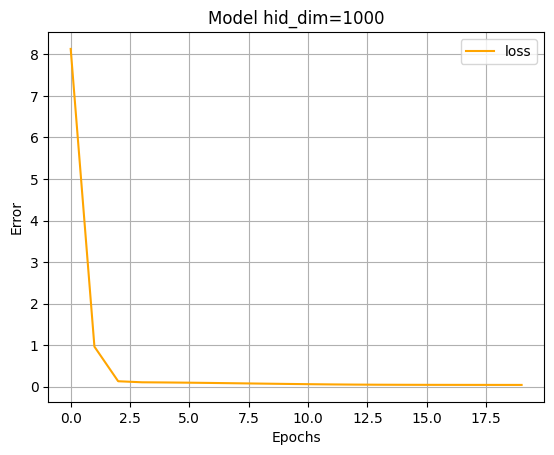

In [274]:
in_sz = 150
hid_sz = 1000 # Hidden layer dim (500->1000)
out_sz = 1
model_hid_1000 = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_1000.compile(optimizer='adam', loss=keras.losses.MeanSquaredLogarithmicError())

history_hid_1000 = model_hid_1000.fit(X_train, y_train, epochs=20, batch_size=32)
show_loss(history_hid_1000, clr='orange', name=f'Model hid_dim={hid_sz}')

scores_hid_1000 = model_hid_1000.evaluate(X_val, y_val, verbose=1)
scores_hid_1000
preds_hid_1000 = model_hid_1000.predict(test_edited)
preds_hid_1000

ans = get_output(preds_hid_1000)
ans

При увеличении нейронов скрытых слоев функция потерь быстрее убывает, следовательно ошибка уменьшается.

Используйте разное количество эпох. Опишите достигнутый результат.

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0378
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0377
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0376
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0375
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0374
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0373
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0372
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0370
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0369
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0369
Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0368
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0366
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0366
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0364
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0363
Epoch 6/50
37/37 ━━━━━━━

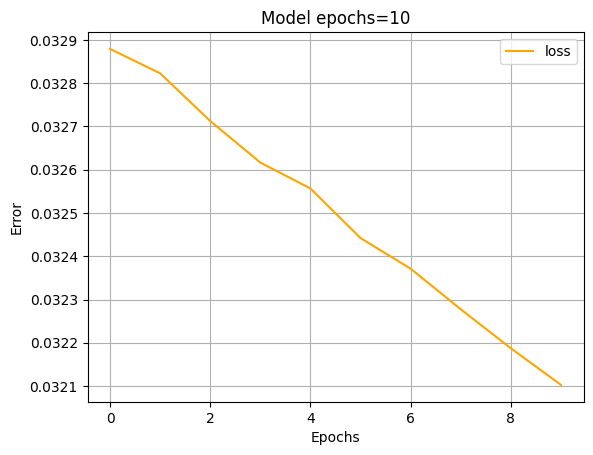

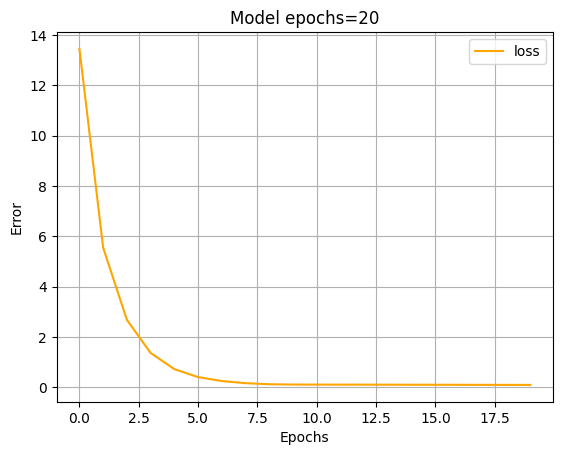

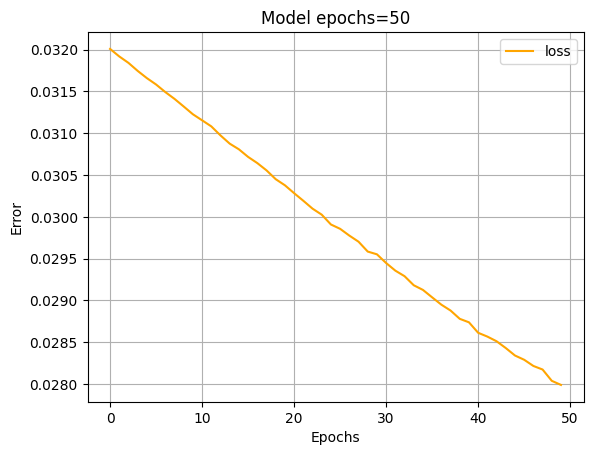

In [261]:
history_hid_100_2 = model_hid_1000.fit(X_train, y_train, epochs=10, batch_size=32)
history_hid_100_3 = model_hid_1000.fit(X_train, y_train, epochs=50, batch_size=32)
show_loss(history_hid_100_2, clr='orange', name='Model epochs=10')
show_loss(history_hid_100, clr='orange', name='Model epochs=20')
show_loss(history_hid_100_3, clr='orange', name=f'Model epochs=50')

При маленьком количестве эпох потери уменьшаются только частично, график нерегулярный -- модель не успевала стабилизироваться -- недостаточное обучение. При большом количестве эпох модель подгоняется под шум и выбросы данных. Среднее значение дало наилучший результат.

Используйте разные размеры мини-выборки (batch_size). Опишите достигнутый результат.

Epoch 1/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0491
Epoch 2/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0489
Epoch 3/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0487
Epoch 4/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0483
Epoch 5/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0481
Epoch 6/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0480
Epoch 7/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0479
Epoch 8/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0478
Epoch 9/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0477
Epoch 10/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0476
Epoch 11/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0475
Epoch 12/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0473
Epoch 13/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0473
Epoch 14/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0471
Epoch 15/20
117/117 ━━━━━━━━━━━━━━━━━━━━ -1s -6000us/ste

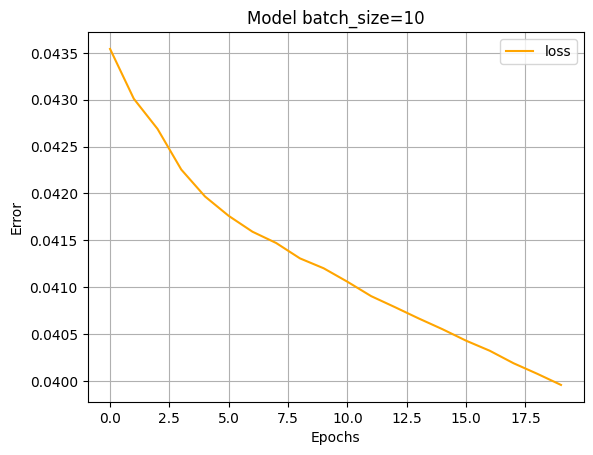

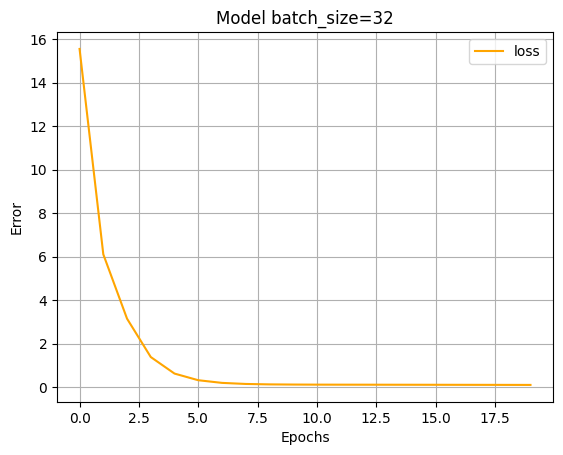

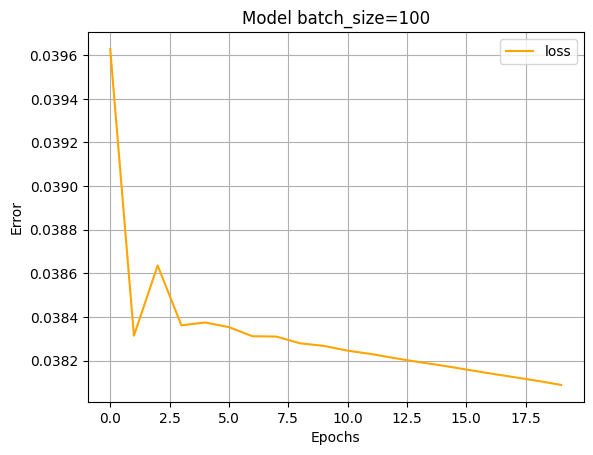

In [275]:
history_hid_100_4 = model_hid_1000.fit(X_train, y_train, epochs=20, batch_size=10)
history_hid_100_5 = model_hid_1000.fit(X_train, y_train, epochs=20, batch_size=100)
show_loss(history_hid_100_4, clr='orange', name='Model batch_size=10')
show_loss(history_hid_100, clr='orange', name='Model batch_size=32')
show_loss(history_hid_100_5, clr='orange', name=f'Model batch_size=100')

При маленьком `batch_size` появляются флуктации в градиентах, так как они зависят от небольших случайных выборок. Весы часто обновляются, для хорошего результата нужно увеличить количество эпох. При среднем значении график нормальный. При больших значениях веса обновляются слишком редко, модель хуже адаптируется к локальным особенностям данных.

Попробуйте использовать разные значения оптимизатора `optimizers` и функции потерь `loss`. Сравните полученные результаты.

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 5.1905
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7284
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3641
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2520
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2101
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1928
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1853
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1818
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1801
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1791
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1783
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1777
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1772
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1766
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1761
Epoch 16/20
37/37 

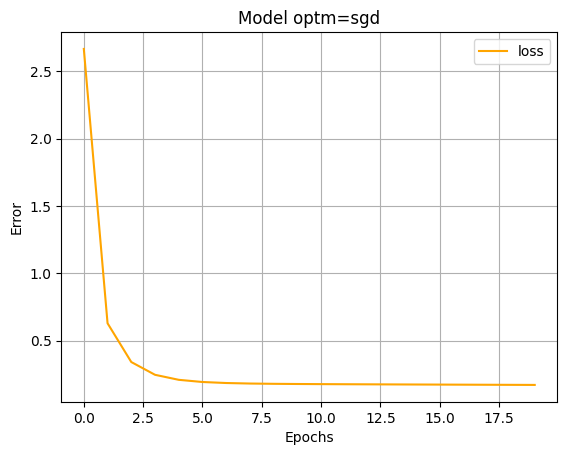

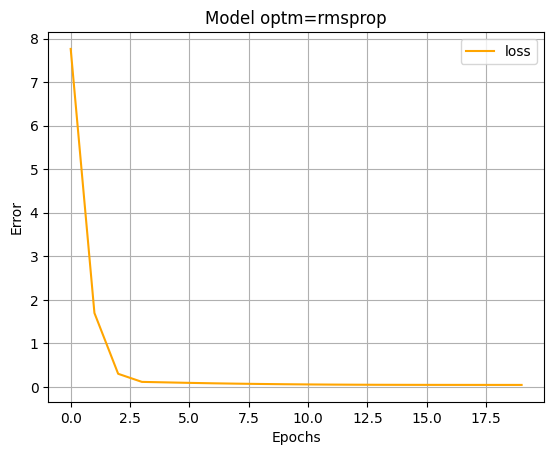

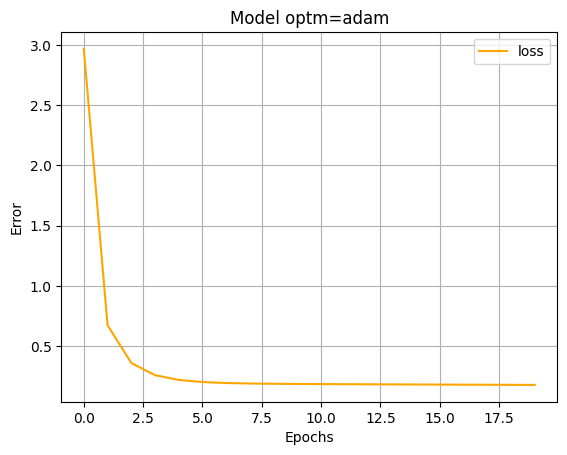

In [282]:
in_sz = 150
hid_sz = 100
out_sz = 1
model_hid_100_new = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_100_new.compile(optimizer='sgd', loss=keras.losses.MeanSquaredLogarithmicError()) # Optimizer

history_hid_100_new = model_hid_100_new.fit(X_train, y_train, epochs=20, batch_size=32)
show_loss(history_hid_100_new, clr='orange', name='Model optm=sgd')

scores_hid_100_new = model_hid_100_new.evaluate(X_val, y_val, verbose=1)
scores_hid_100_new
preds_hid_100_new = model_hid_100_new.predict(test_edited)
preds_hid_100_new

ans = get_output(preds_hid_100_new)
ans

model_hid_100_new_2 = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_100_new_2.compile(optimizer='rmsprop', loss=keras.losses.MeanSquaredLogarithmicError()) # Optimizer

history_hid_100_new_2 = model_hid_100_new_2.fit(X_train, y_train, epochs=20, batch_size=32)
show_loss(history_hid_100_new_2, clr='orange', name='Model optm=rmsprop')

scores_hid_100_new_2 = model_hid_100_new_2.evaluate(X_val, y_val, verbose=1)
scores_hid_100_new_2
preds_hid_100_new_2 = model_hid_100_new_2.predict(test_edited)
preds_hid_100_new_2

ans = get_output(preds_hid_100_new_2)
ans

show_loss(history_hid_100, clr='orange', name='Model optm=adam')

Лучше всего получился результат с `rmsprop`, хуже всего с `sgd`, `adam` посередине.

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 173644.2656
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 108786.9141
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 54888.9141
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 49180.0547
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 45863.3906
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42554.2812
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39146.8750
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36694.3398
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34704.1172
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 33129.6250
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32054.9102
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31251.5352
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30947.8535
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30349.8613
Epoch 15/20
37/37 ━━━━━━━━

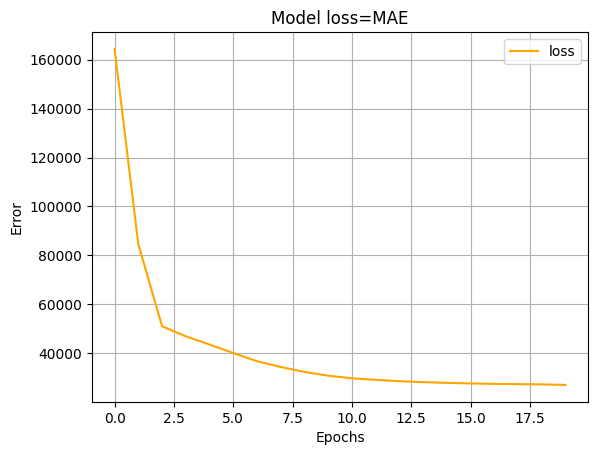

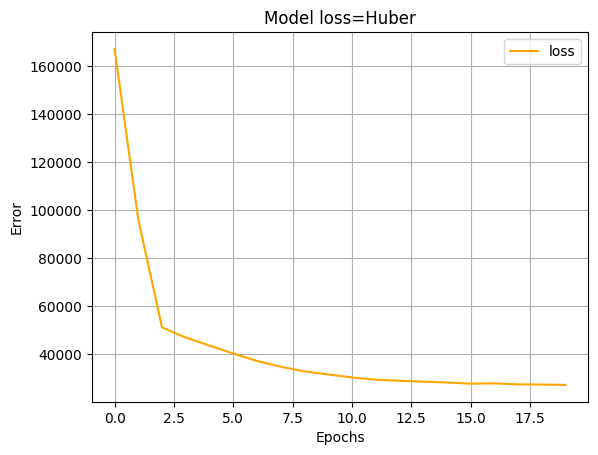

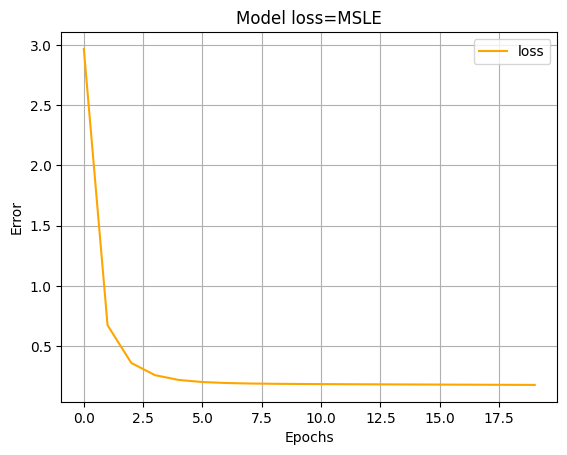

In [283]:
in_sz = 150
hid_sz = 100
out_sz = 1
model_hid_100_new = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_100_new.compile(optimizer='adam', loss=keras.losses.MeanAbsoluteError())

history_hid_100_new = model_hid_100_new.fit(X_train, y_train, epochs=20, batch_size=32)
show_loss(history_hid_100_new, clr='orange', name='Model loss=MAE')

scores_hid_100_new = model_hid_100_new.evaluate(X_val, y_val, verbose=1)
scores_hid_100_new
preds_hid_100_new = model_hid_100_new.predict(test_edited)
preds_hid_100_new

ans = get_output(preds_hid_100_new)
ans

model_hid_100_new_2 = get_seq_model(in_dim=in_sz, out_dim=out_sz, hid_dim=hid_sz)
model_hid_100_new_2.compile(optimizer='adam', loss=keras.losses.Huber()) 

history_hid_100_new_2 = model_hid_100_new_2.fit(X_train, y_train, epochs=20, batch_size=32)
show_loss(history_hid_100_new_2, clr='orange', name='Model loss=Huber')

scores_hid_100_new_2 = model_hid_100_new_2.evaluate(X_val, y_val, verbose=1)
scores_hid_100_new_2
preds_hid_100_new_2 = model_hid_100_new_2.predict(test_edited)
preds_hid_100_new_2

ans = get_output(preds_hid_100_new_2)
ans

show_loss(history_hid_100, clr='orange', name='Model loss=MSLE')

Результат с `MSLE` получился более "спокойный" вследствие логарифмирования. `Huber` (комбинация `MAE` и `MSE`) и `MAE` очень похожи друг на друга.

## Вопросы

Как выше перечисленные параметры влияют на полученный вами результат?

Что такое эпоха (Epoch)? В чем отличие от итерации (Iteration)?

Что такое функция активации? Какие вам известны? Как и зачем используются в нейронной сети?

Что такое MSE(Mean Squared Error) - Средняя квадратичная ошибка? Что такое MAE(Mean Absolute Error)? Для чего используются.